In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as display
import plotly.graph_objs as go

In [10]:
# Read the data to the dataframe from the data files.

#state_year_month_df contains data for each state, segragated into year and month
state_year_month_df=pd.read_csv('only_road_accidents_data_month2.csv')

#state_year_time_df contains data for each state, segragated into year and time of the day
state_year_time_df=pd.read_csv('only_road_accidents_data3.csv')

In [11]:
state_year_month_df.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [12]:
state_year_time_df.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [13]:
#Get all the state names in an array..
state_names=state_year_month_df['STATE/UT'].unique()
print(state_names)

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'D&N Haveli' 'Daman & Diu'
 'Delhi (Ut)' 'Delhi Ut' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [14]:
#state_year_month_df=state_year_month_df['STATE/UT']
state_year_month_df['STATE/UT']=state_year_month_df['STATE/UT'].replace({'Delhi (Ut)': 'Delhi Ut', 'D & N Haveli':'D&N Haveli'})
print(state_year_month_df['STATE/UT'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D&N Haveli' 'Daman & Diu' 'Delhi Ut' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


In [15]:
# Reassiging state names to variable..
state_names=state_year_month_df['STATE/UT'].unique()

In [16]:
#display(state_year_month_df.head())

#Create season groups clubbing values from multiple month columns..
state_year_month_df['SUMMER']=state_year_month_df[['JUNE','JULY','AUGUST']].sum(axis=1)
state_year_month_df['AUTUMN']=state_year_month_df[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
state_year_month_df['WINTER']=state_year_month_df[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
state_year_month_df['SPRING']=state_year_month_df[['MARCH','APRIL','MAY']].sum(axis=1)

#Delete month columns..
state_year_month_df=state_year_month_df.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
#Create groups of states, summing the values of accident number for each year..
state_grouped=state_year_month_df.groupby(['STATE/UT']).sum()

#Create % columns for noting the % of accidents happening in each state for each season..
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']

display(state_grouped.iloc[:,1:].head())

,TOTAL,SUMMER,AUTUMN,WINTER,SPRING,%_SUMMER,%_AUTUMN,%_WINTER,%_SPRING
STATE/UT,,,,,,,,,
A & N Islands,2893,689,710,779,715,0.238161,0.245420,0.269271,0.247148
Andhra Pradesh,546821,132891,129230,138633,146067,0.243025,0.236330,0.253525,0.267120
Arunachal Pradesh,3389,748,875,920,846,0.220714,0.258188,0.271467,0.249631
Assam,61718,14696,15382,15671,15969,0.238115,0.249230,0.253913,0.258741
Bihar,92648,23506,20866,21994,26282,0.253713,0.225218,0.237393,0.283676


In [17]:
#Working on the over the day data...
state_year_time_df.rename(columns={'0-3 hrs. (Night)':'0-3',
                              '3-6 hrs. (Night)':'3-6',
                                '6-9 hrs (Day)':'6-9', '9-12 hrs (Day)':'9-12','12-15 hrs (Day)':'12-15','15-18 hrs (Day)':'15-18',
                                  '18-21 hrs (Night)':'18-21','21-24 hrs (Night)':'21-24'}, inplace=True)
state_time_grouped=state_year_time_df.groupby(['STATE/UT']).sum()

state_time_grouped['%_MORNING']=(state_time_grouped['6-9']+state_time_grouped['9-12'])/state_time_grouped['Total']
state_time_grouped['%_AFTERNOON']=(state_time_grouped['12-15']+state_time_grouped['15-18'])/state_time_grouped['Total']
state_time_grouped['%_EVENING']=(state_time_grouped['18-21']+state_time_grouped['21-24'])/state_time_grouped['Total']
state_time_grouped['%_NIGHT']=(state_time_grouped['0-3']+state_time_grouped['3-6'])/state_time_grouped['Total']

state_time_grouped=state_time_grouped.drop(state_time_grouped.columns[0:9], axis=1)
display(state_time_grouped.head())

,Total,%_MORNING,%_AFTERNOON,%_EVENING,%_NIGHT
STATE/UT,,,,,
A & N Islands,2893,0.297961,0.402351,0.260283,0.039405
Andhra Pradesh,546821,0.243550,0.266599,0.281997,0.207854
Arunachal Pradesh,3389,0.291531,0.383889,0.213927,0.110652
Assam,61718,0.370556,0.363022,0.172510,0.093911
Bihar,92648,0.304853,0.299855,0.208423,0.186869


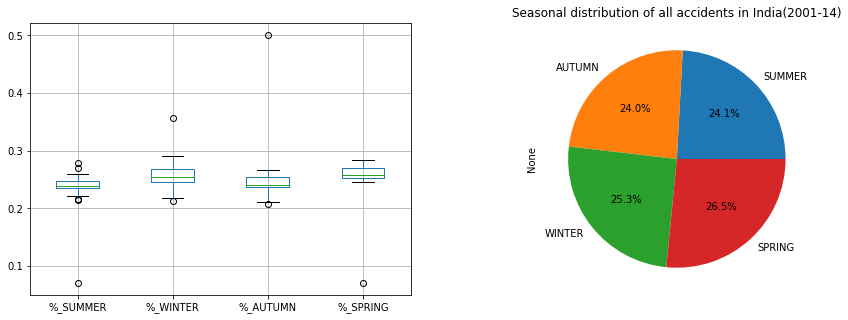

In [18]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
boxplot=state_grouped.boxplot(ax=ax,column=['%_SUMMER','%_WINTER','%_AUTUMN','%_SPRING'])

ax=plt.subplot(1,2,2)
state_grouped.loc[:,'SUMMER':'SPRING'].sum(axis=0).plot.pie(title='Seasonal distribution of all accidents in India(2001-14)',autopct='%1.1f%%')

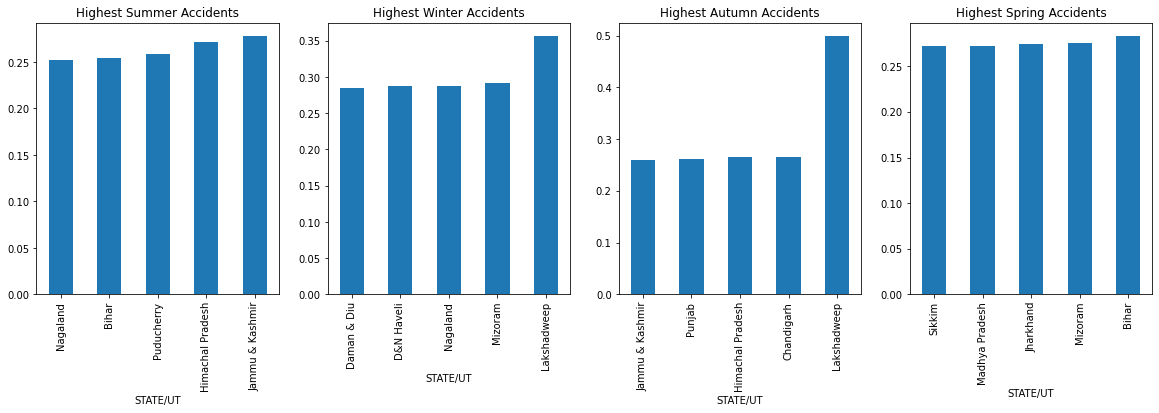

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(141)
summer_sorted=state_grouped.sort_values('%_SUMMER')
summer_sorted['%_SUMMER'].tail(5).plot.bar(title='Highest Summer Accidents')
plt.subplot(142)
winter_sorted=state_grouped.sort_values('%_WINTER')
winter_sorted['%_WINTER'].tail(5).plot.bar(title='Highest Winter Accidents')
plt.subplot(143)
autumn_sorted=state_grouped.sort_values('%_AUTUMN')
autumn_sorted['%_AUTUMN'].tail(5).plot.bar(title='Highest Autumn Accidents')
plt.subplot(144)
spring_sorted=state_grouped.sort_values('%_SPRING')
spring_sorted['%_SPRING'].tail(5).plot.bar(title='Highest Spring Accidents')

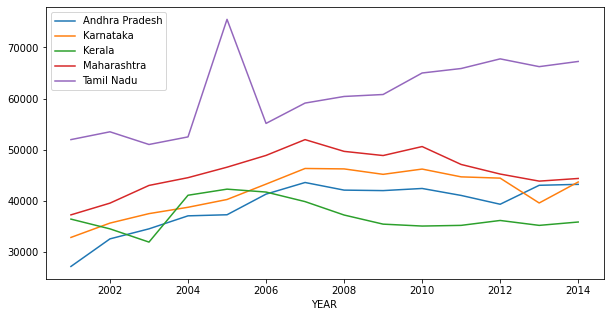

In [20]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
high_states=list(highest_accident_states.head().index)
df4=state_year_month_df.loc[state_year_month_df['STATE/UT'].isin(high_states),['STATE/UT','YEAR','TOTAL']]

plt.figure(figsize=(10,5))
ax=plt.subplot(111)
for key, grp in df4.groupby(['STATE/UT']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)
  
plt.show()


In [21]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
state_list=list(highest_accident_states.head().index)
print(state_list)

['Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Kerala']


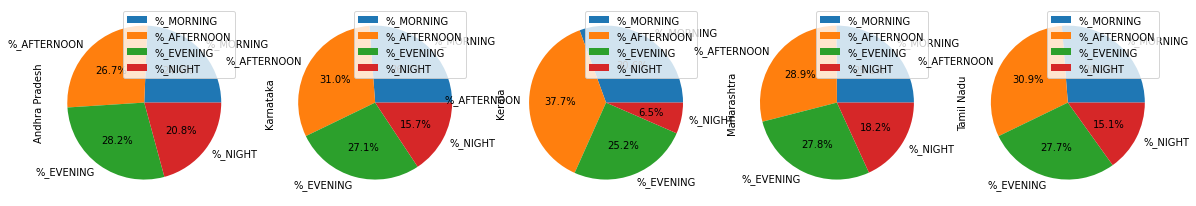

In [22]:
df=state_time_grouped.loc[state_time_grouped.index.isin(state_list)]

df_T=df.groupby('STATE/UT').sum().drop(['Total'], axis=1).T.plot.pie(subplots=True, figsize=(20, 5),autopct='%1.1f%%')


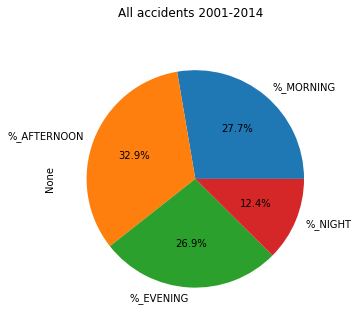

In [23]:
## Break up accidents for all states over the time blocks:
#state_time_grouped.info()
df2=state_time_grouped.sum(axis=0)



df2.drop(['Total']).T.plot.pie(title='All accidents 2001-2014',subplots=True, figsize=(5,5),autopct='%1.1f%%')

df2=state_time_grouped.sum(axis=0)

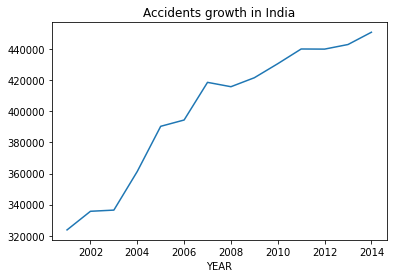

In [24]:
df3=state_year_time_df.groupby(['YEAR']).sum()
df3.loc[:,'Total'].plot(title='Accidents growth in India')

In [25]:
#Create a new dataframe - period_performance.
period_performance=pd.DataFrame(columns=['STATE/UT','%_CHANGE_2001_TO_2014'])

#Take one state name at a time,
for state in state_names:
    #print(state)
    total_2001=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2001), 'TOTAL']
    total_2014=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2014), 'TOTAL']
    value_2001=total_2001.iloc[0]
    value_2014=total_2014.iloc[0]
    change_in_percent= (value_2014-value_2001)*100/value_2001
   
    new_data=pd.Series({'STATE/UT':state, '%_CHANGE_2001_TO_2014':change_in_percent})
    period_performance=period_performance.append(new_data, ignore_index=True)

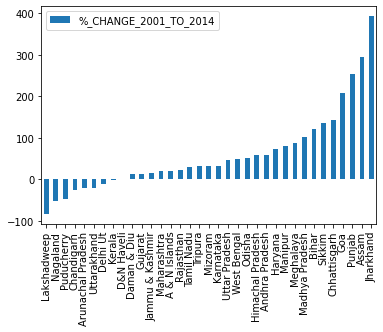

In [26]:
best_performing=period_performance.sort_values('%_CHANGE_2001_TO_2014')
#print(best_performing.head())
ax=best_performing.plot(kind='bar').set_xticklabels(best_performing['STATE/UT'])